In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.constants import c
c = c.value*1e-6
%matplotlib inline
from scipy.fftpack import fft, fftfreq
from scipy.interpolate import splev, splrep

In [2]:
def sincfit(x, A, B, C, D):
    return A*(np.sinc(B*x+C))*np.cos(D*x)
params = [-1.79425356e-04,   1.07657567e-01,  -4.17755798e+01, 6.20927874]

In [3]:
x = np.r_[180:580:10000j]
y = sincfit(x, *params)

In [4]:
geteven = lambda x: 0.5*(x[1:] + x[::-1][:-1])
getodd = lambda x: 0.5*(x[1:] - x[::-1][:-1])

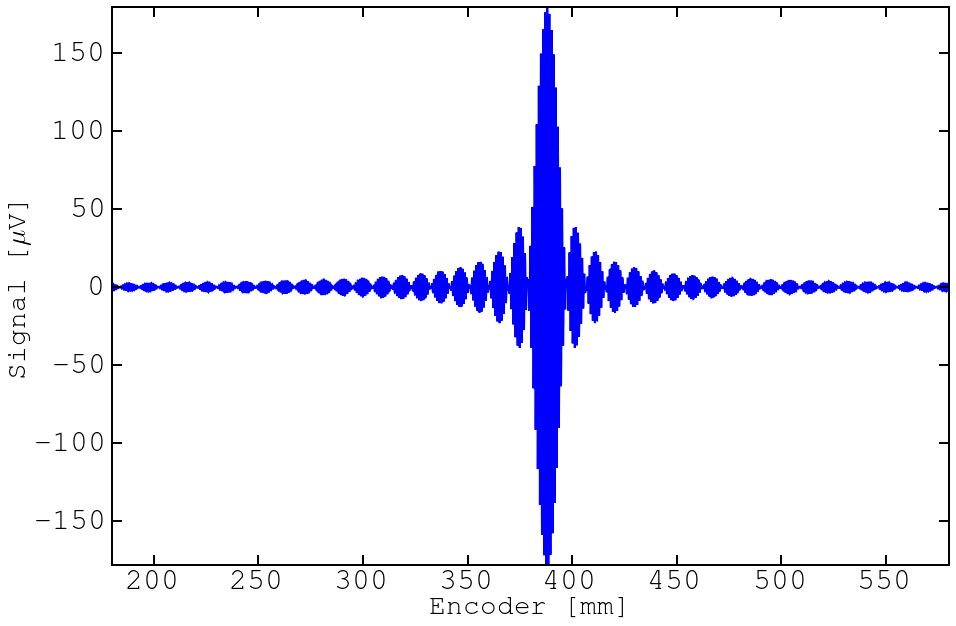

In [5]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(x, y*1e6)
ax.axis('tight')
ax.set_xlabel(r'Encoder [mm]')
ax.set_ylabel(r'Signal [$\mu$V]')
ax.set_xticklabels(['{0:3.0f}'.format(t) for t in ax.get_xticks()])
ax.set_yticklabels(['{0:3.0f}'.format(t) for t in ax.get_yticks()]);

In [6]:
phaseshift = np.round(((-params[2]/params[1])*params[-1])/np.pi)
peak =  (np.pi/params[-1])*phaseshift
print (peak)
delta = peak - (-params[2]/params[1])
print (delta)
pd = (x - peak)*(2/c)

388.064647474
0.0233702636029


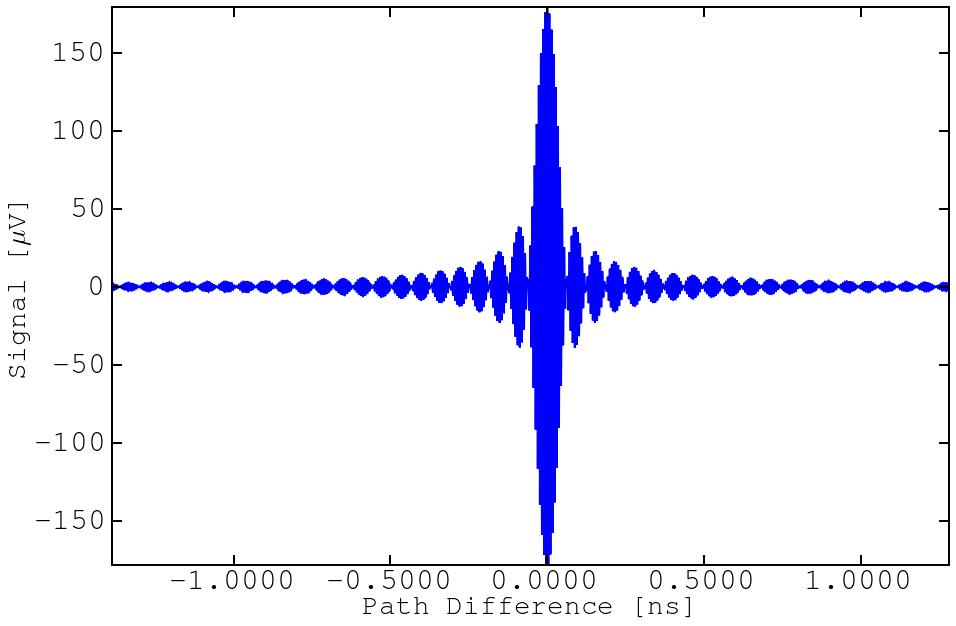

In [7]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(pd, y*1e6)
ax.axis('tight')
ax.set_xlabel(r'Path Difference [ns]')
ax.set_ylabel(r'Signal [$\mu$V]')
ax.set_xticklabels(['{0:0.4f}'.format(t) for t in ax.get_xticks()])
ax.set_yticklabels(['{0:3.0f}'.format(t) for t in ax.get_yticks()]);

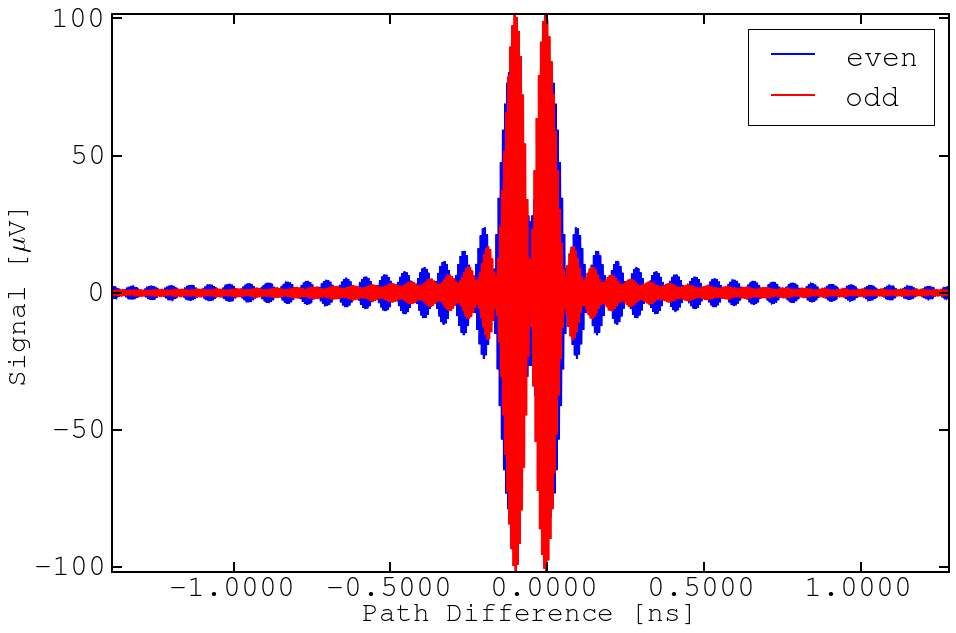

In [8]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(pd[1:], geteven(y)*1e6, 'b', label='even')
ax.plot(pd[1:], getodd(y)*1e6, 'r', label='odd')
ax.axis('tight')
ax.set_xlabel(r'Path Difference [ns]')
ax.set_ylabel(r'Signal [$\mu$V]')
ax.legend(loc='best')
ax.set_xticklabels(['{0:0.4f}'.format(t) for t in ax.get_xticks()])
ax.set_yticklabels(['{0:3.0f}'.format(t) for t in ax.get_yticks()]);

In [9]:
n = 12
k = 2.0
dx  = k*2**(1 - n)
pdnew = dx * np.arange(0, 2**n + 1) - k
pdnew = pdnew[:-1]

In [10]:
tck, fp, ier, msg = splrep(pd,y,w=None,k=3, task=0,s=None,full_output=True)
print (msg)
ynew = splev(pdnew, tck, der=0, ext=1)

The spline is an interpolating spline (fp=0)


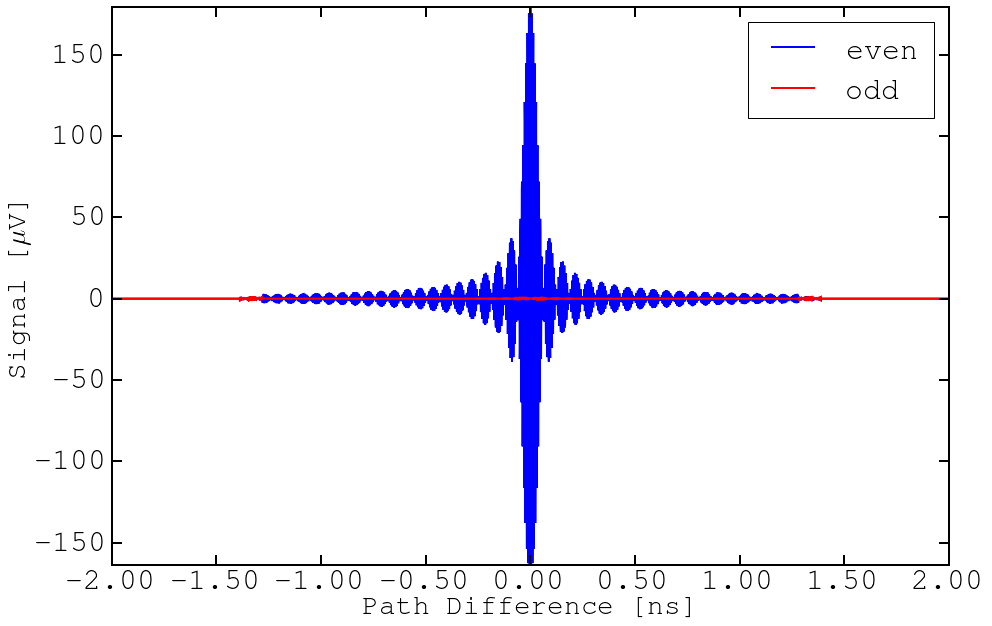

In [11]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(pdnew[1:], geteven(ynew)*1e6, 'b', label='even')
ax.plot(pdnew[1:], getodd(ynew)*1e6, 'r', label='odd')
ax.axis('tight')
ax.set_xlabel(r'Path Difference [ns]')
ax.set_ylabel(r'Signal [$\mu$V]')
ax.legend(loc='best')
ax.set_xticklabels(['{0:0.2f}'.format(t) for t in ax.get_xticks()])
ax.set_yticklabels(['{0:3.0f}'.format(t) for t in ax.get_yticks()]);

In [18]:
spectrum = fft(ynew)
freq = fftfreq(len(pdnew),  pdnew[1] - pdnew[0])
spectrum *= np.exp(1j*2*np.pi*delta*freq*params[1])
thresh = np.logical_and(freq <= 200, freq >= 100)

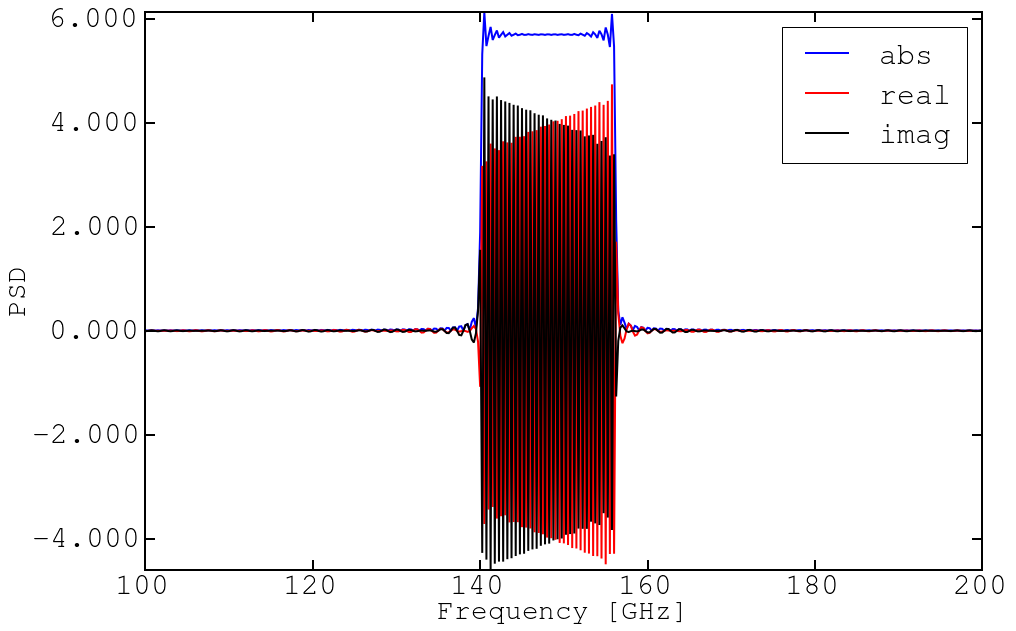

In [19]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(freq[thresh], np.abs(spectrum[thresh])*1e3, label='abs')
ax.plot(freq[thresh], np.real(spectrum[thresh])*1e3, 'r', label='real')
ax.plot(freq[thresh], np.imag(spectrum[thresh])*1e3, 'k', label='imag')
ax.axis('tight')
ax.set_xlabel(r'Frequency [GHz]')
ax.set_ylabel(r'PSD')
ax.legend(loc='best')
ax.set_xticklabels(['{0:3.0f}'.format(t) for t in ax.get_xticks()])
ax.set_yticklabels(['{0:1.3f}'.format(t) for t in ax.get_yticks()]);

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(freq[thresh], np.unwrap(np.angle(spectrum[thresh])))
ax.axis('tight')
ax.set_xlabel(r'Frequency [GHz]')
ax.set_ylabel(r'Phase')
ax.set_xticklabels(['{0:3.0f}'.format(t) for t in ax.get_xticks()])
ax.set_yticklabels(['{0:3.2f}'.format(t) for t in ax.get_yticks()]);

In [ ]:
c